## ***Neural Networks from scratch ***
In this project, we will build neural networks by  implementing the mathematical formulas used in forward and backward propagation. This yields an accuracy of **85%** on the training data set.


In this project we use Neural networks to classify the handwritten  digits of the 'MNIST digits' data set.


\


---
The operations such as *classification*, *regularization*, and *optimization* techniques like *gradient descent* are performed with pure mathematical expressions .

Implementing neural networks from scratch helped me in practical implementation of the learnings from the Coursera course, made available by Deep learning AI


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/train.csv.zip")

In [ ]:
len(data)

42000

In [ ]:
data = np.array(data)
x,y = data.shape
np.random.shuffle(data)

# split into train and test sets
x_train = data[:40000]
y_train = x_train[0]
x_train = x_train/255

x_test = data[40000:]
y_test = x_test[0]
x_test = x_test/255



In [ ]:
print( x_train.shape,  x_test.shape)
n_x=x_train.shape[0]

(40000, 785) (2000, 785)


**Random** **Initialisation** of the trainable parameters - weights and biases

In [ ]:
def  init_params( ):
    W1 = np.random.rand(10, n_x) * 0.01
    B1 = np.random.rand(10, 1) * 0.01
    W2 = np.random.rand(10, 10) * 0.01
    B2 = np.random.rand(10, 1) * 0.01
    return W1, B1, W2, B2


How to make the model more robust?


We use **ReLU** that introduces non-linearity to hidden layers by allowing positive input values to pass through unchanged while setting negative values to zero. This makes the model robust due to the complex patterns introduced.



**Softmax function** is designed for multi-class classification problems. It transforms logits into probabilities. It ensures that the sum of probabilities equals 1, representing the confidence of predictions.
The below image perfectly potrays the work of a softmax. In this image, the output neurons have values who sum up to 1


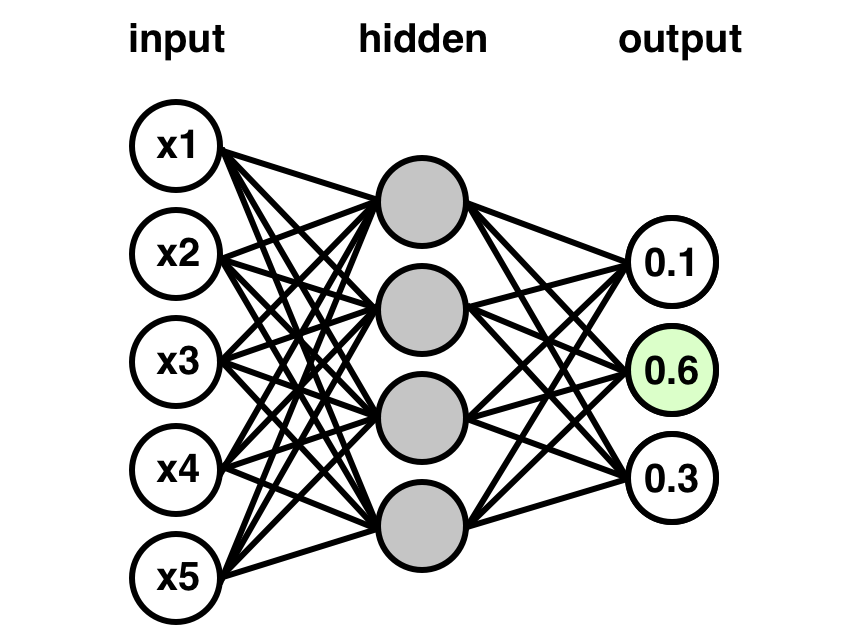

In [ ]:
def relu(Z):
    return np.maximum(Z,0)

def softmx(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmx(Z2)
    return Z1, A1, Z2, A2

How to deal with categorical data?
\
\
We use **One-hot Encoding** that helps represent categorical data as numerical values by introducing binary columns for each category

In [ ]:
def label_encoded (Y):
    i = np.zeros((Y.size, Y.max() + 1))
    i[np.arange(Y.size), Y] = 1
    i = i.T
    return i
def backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    prob_Y = label_encoded (Y)
    dZ2 = A2 - prob_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 =1/m  * np.sum(dZ1)
    return dW1, dB1, dW2, dB2

Implementation of the **Gradient descent** algorithm

In [ ]:
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, a):

    W1 = W1 - a * dW1
    B1 = B1 - a * dB1
    W2 = W2 - a * dW2
    B2 = B2 - a * dB2
    return W1, B1, W2, B2

In [ ]:

def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [ ]:
def train(X, Y, epochs, alpha):
    W1, B1, W2, B2 =  init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backward_pass(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0 :
          print('epoch',i)
          predictions = get_predictions(A2)
          print('accuracy',get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2

Training

In [ ]:
W1, B1, W2, B2 = train(x_train, y_train, 500, 0.05)

Epoch : 0
Accuracy : 0.06373170731707317
Epoch : 10
Accuracy : 0.1253170731707317
Epoch : 20
Accuracy : 0.19163414634146342
Epoch : 30
Accuracy : 0.26702439024390245
Epoch : 40
Accuracy : 0.3324146341463415
Epoch : 50
Accuracy : 0.39570731707317075
Epoch : 60
Accuracy : 0.4612926829268293
Epoch : 70
Accuracy : 0.5154878048780488
Epoch : 80
Accuracy : 0.5590731707317074
Epoch : 90
Accuracy : 0.5956341463414634
Epoch : 100
Accuracy : 0.6225365853658537
Epoch : 110
Accuracy : 0.6471463414634147
Epoch : 120
Accuracy : 0.6663658536585366
Epoch : 130
Accuracy : 0.6848536585365854
Epoch : 140
Accuracy : 0.6999024390243902
Epoch : 150
Accuracy : 0.7130731707317073
Epoch : 160
Accuracy : 0.7254634146341463
Epoch : 170
Accuracy : 0.7359024390243902
Epoch : 180
Accuracy : 0.7457560975609756
Epoch : 190
Accuracy : 0.7541707317073171
Epoch : 200
Accuracy : 0.762609756097561
Epoch : 210
Accuracy : 0.7703658536585366
Epoch : 220
Accuracy : 0.7771707317073171
Epoch : 230
Accuracy : 0.7829268292682927


In [ ]:
def make_predictions(X, W1, B1, W2, B2):
    _,_,_,A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions


**Testing**

In [ ]:
def test_prediction(index, W1, B1, W2, B2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, B1, W2, B2)
    label = y_train[index]
    print("Prediction : ", prediction)
    print("Label : ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction :  [2]
Label :  2


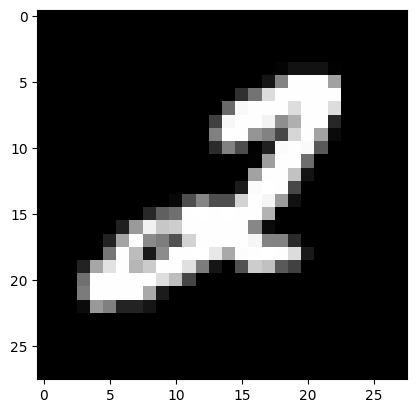

In [ ]:
test_prediction(154, W1, B1, W2, B2,)